<a href="https://colab.research.google.com/github/RaymondUW2023/NN-Group-Project-Team-14/blob/main/PCA_of_Cifar_10_And_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Examples of PCA and Logisitic regression followed from Tensorflow and sklearn website
# Optimization loop of hyperparamter is done by the team

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

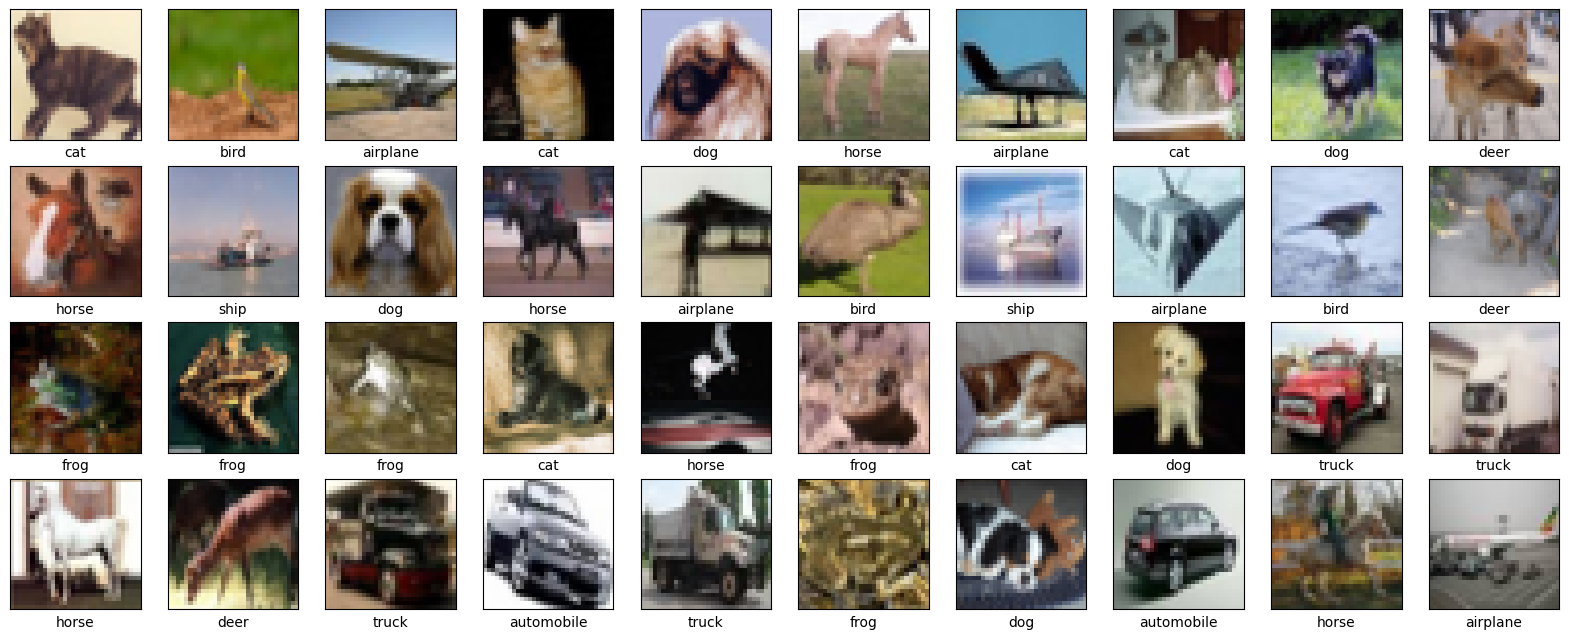

In [4]:
# Visualizing the Data

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20,20))
for i in range(40):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i+3568])
    plt.xlabel(class_names[train_labels[i+3568][0]])
plt.show()

In [5]:
x_train = train_images.reshape((50000,3072))
x_test = test_images.reshape((10000,3072))
y_train = train_labels.reshape(50000,)
y_test = test_labels.reshape(10000,)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((50000, 3072), (10000, 3072), (50000,), (10000,))

Applying PCA

In [6]:
import sklearn
from sklearn.decomposition import PCA

In [7]:
k = 200
pca = PCA(n_components=k)
x_train_transformed = pca.fit_transform(x_train)
x_test_transformed = pca.transform(x_test)
x_train_transformed.shape, x_test_transformed.shape

((50000, 200), (10000, 200))

Building a Log Regression Classifier

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
# Create a logistic regression model for multiclass classification

logreg = LogisticRegression(max_iter=10000,random_state=7,multi_class='multinomial',C=0.001)

# Train the model
logreg.fit(x_train_transformed, y_train)

# Make predictions on the test set
predictions = logreg.predict(x_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of the Logistic Regression model:", accuracy)

Accuracy of the Logistic Regression model: 0.4054


Optimizing the PCA for Logistic Regression

In [24]:
# Model building:  KNN classifier
range_for_data = 80
accuacy_index_for_PCA_LogReg = tf.zeros(range_for_data).numpy()
parameter_index_for_KNN_for_graph = tf.zeros(range_for_data).numpy()
temp_state = 0
counter = 0
for i in range(150,225):
  counter = counter + 1
  pca = PCA(n_components=i)
  x_train_transformed = pca.fit_transform(x_train)
  x_test_transformed = pca.transform(x_test)
  x_train_transformed.shape, x_test_transformed.shape
  #
  logreg = LogisticRegression(max_iter=10000,random_state=7,multi_class='multinomial',C=0.01)
  #
  logreg.fit(x_train_transformed, y_train)
  #
  acc = logreg.score(x_test_transformed,y_test)
  accuacy_index_for_PCA_LogReg[counter-1] = acc
  parameter_index_for_KNN_for_graph[counter-1] = i
  print(i)
  if acc > temp_state:
    temp_state = acc
    best_number_PCA_classifiers = i

150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224


189


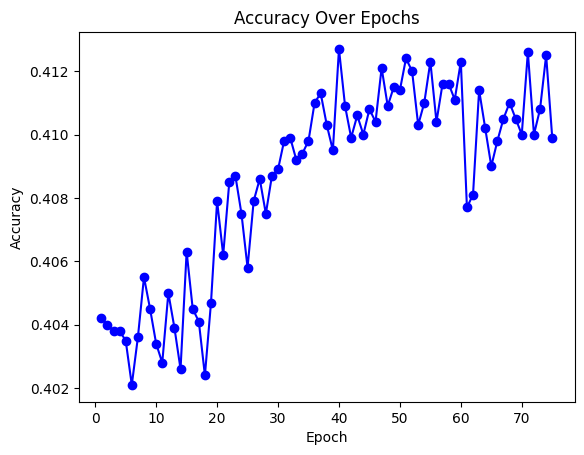

In [25]:
print(best_number_PCA_classifiers)

# Plot the vector
plt.plot(np.arange(1, len(accuacy_index_for_PCA_LogReg[0:75])+1), accuacy_index_for_PCA_LogReg[0:75], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')

# Show the plot
plt.show()

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
pca = PCA(n_components=best_number_PCA_classifiers)
x_train_transformed = pca.fit_transform(x_train)
x_test_transformed = pca.transform(x_test)
x_train_transformed.shape, x_test_transformed.shape
logreg = LogisticRegression(max_iter=10000,random_state=7,multi_class='multinomial',C=0.01)
logreg.fit(x_train_transformed, y_train)
y_hat = y_pred = logreg.predict(x_test_transformed)
Cmat = confusion_matrix(y_test, y_hat)
acc = logreg.score(x_test_transformed,y_test)



Confusion Matrix: 
[[473  46  55  37  18  28  25  49 187  82]
 [ 63 485  26  33  29  34  37  55  76 162]
 [ 98  46 268  87 119  83 152  76  49  22]
 [ 41  65 100 280  55 172 126  57  44  60]
 [ 61  27 146  61 298  84 167 104  21  31]
 [ 46  45  94 148  72 346  92  78  54  25]
 [ 12  44  74 125  86  71 514  31  14  29]
 [ 47  49  61  59  92  72  60 446  39  75]
 [172  75  20  23   9  50  12  19 528  92]
 [ 76 176  17  30  19  26  46  47  91 472]]
Accuracy: 41.10%


In [29]:
print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.3f')) + '%')

Confusion Matrix: 
[[473  46  55  37  18  28  25  49 187  82]
 [ 63 485  26  33  29  34  37  55  76 162]
 [ 98  46 268  87 119  83 152  76  49  22]
 [ 41  65 100 280  55 172 126  57  44  60]
 [ 61  27 146  61 298  84 167 104  21  31]
 [ 46  45  94 148  72 346  92  78  54  25]
 [ 12  44  74 125  86  71 514  31  14  29]
 [ 47  49  61  59  92  72  60 446  39  75]
 [172  75  20  23   9  50  12  19 528  92]
 [ 76 176  17  30  19  26  46  47  91 472]]
Accuracy: 41.100%


In [27]:
import numpy as np
import pandas as pd
from google.colab import drive

In [28]:
# Mount Google Drive
drive.mount('/content/drive')

# Save the array to a CSV file
csv_filename = '/content/drive/MyDrive/my_array_LogReg.csv'
np.savetxt(csv_filename, accuacy_index_for_PCA_LogReg, delimiter=',')
csv_filename = '/content/drive/MyDrive/my_array_LogReg2.csv'
np.savetxt(csv_filename, parameter_index_for_KNN_for_graph, delimiter=',')


Mounted at /content/drive
